In [37]:
#load the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt


In [38]:
file_path = "/Users/gracewang/dev/visualization/02_activities/assignments/49_census_divisions_mof_population_projections_2023-2051.xlsx"  
data = pd.ExcelFile(file_path)
print(data.sheet_names)

['CDs Age & Gender 2023-2051']


In [39]:
sheet_name = "CDs Age & Gender 2023-2051"  
df = data.parse(sheet_name)
df

,"Population Projections for Ontario's 49 Census Divisions by Age and Gender, 2023-2051",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 108,Unnamed: 109,Unnamed: 110,Unnamed: 111,Unnamed: 112,Unnamed: 113,Unnamed: 114,Unnamed: 115,Unnamed: 116,Unnamed: 117
0,Sources: Statistics Canada for 2023 and Ontari...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,BROAD AGE GROUPS,NaN,NaN,5-YEAR AGE GROUPS,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,YEAR (JULY 1),REGION CODE,REGION NAME,GENDER,TOTAL,0 to 14,15 to 64,65 Plus,0 to 4,5 to 9,...,81.0,82.0,83.0,84.0,85.0,86.0,87.0,88.0,89.0,90+
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4263,2051,45,SUDBURY,TOTAL BOTH GENDERS,26174,3111,15000,8063,980,1067,...,261.0,244.0,230.0,212.0,233.0,220.0,213.0,194.0,171.0,731
4264,2051,46,TIMISKAMING,TOTAL BOTH GENDERS,32253,4690,18907,8656,1520,1600,...,298.0,284.0,258.0,250.0,264.0,269.0,254.0,242.0,202.0,1008
4265,2051,47,KENORA,TOTAL BOTH GENDERS,86426,14778,55187,16461,4876,5010,...,544.0,502.0,462.0,448.0,442.0,419.0,401.0,388.0,330.0,1456
4266,2051,48,RAINY RIVER,TOTAL BOTH GENDERS,18795,2803,11152,4840,883,949,...,167.0,153.0,146.0,135.0,141.0,150.0,135.0,121.0,113.0,593


In [40]:
# Skip unnecessary rows
df_cleaned = data.parse(sheet_name, skiprows=3)

# Use the first row as column headers and drop unnecessary rows
df_cleaned.columns = df_cleaned.iloc[0]
df_cleaned = df_cleaned[1:]

# Drop columns or rows with all NaN values
df_cleaned = df_cleaned.dropna(how="all", axis=1)
df_cleaned = df_cleaned.dropna(how="all")

# Reset the index for clarity
df_cleaned.reset_index(drop=True, inplace=True)

In [41]:
#Convert relevant columns to numeric
numeric_columns = ["YEAR (JULY 1)", "TOTAL", "0 to 14", "15 to 64", "65 Plus"]
for col in numeric_columns:
    df_cleaned[col] = pd.to_numeric(df_cleaned[col], errors="coerce")


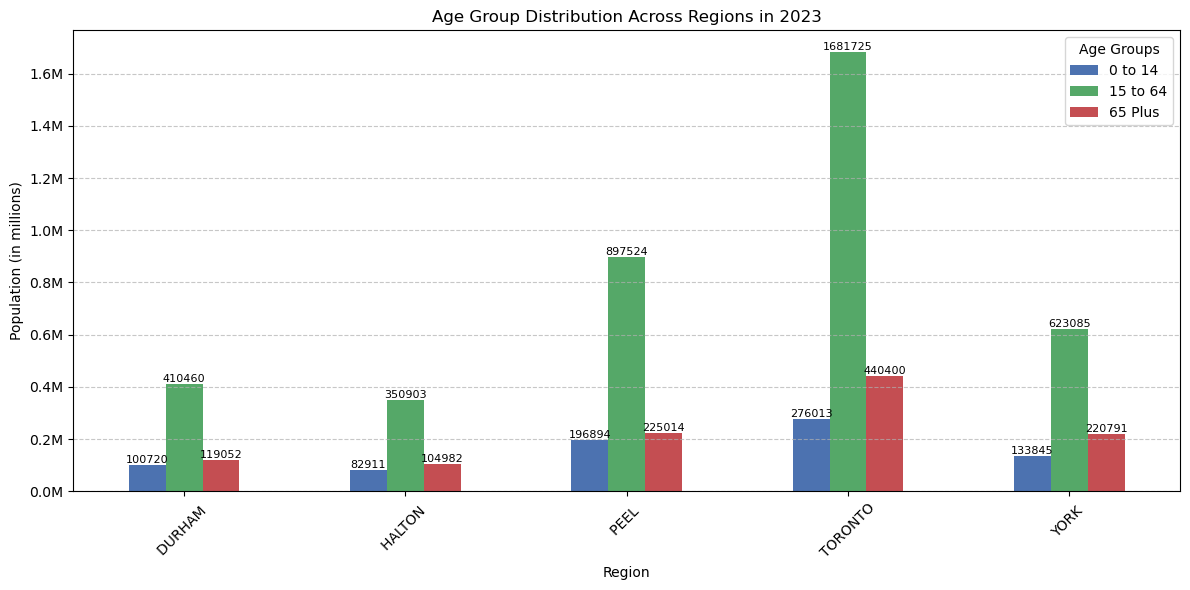

In [45]:
ax = subset_1_grouped.plot(
    kind="bar",
    figsize=(12, 6),
    title="Age Group Distribution Across Regions in 2023",
    color=["#4C72B0", "#55A868", "#C44E52"],  # Custom colors for age groups
)

# Add data labels
for container in ax.containers:
    ax.bar_label(container, fmt="%.0f", label_type="edge", fontsize=8)

# Update y-axis to display population in millions
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f"{x/1e6:.1f}M"))

# Update axis labels and legend
plt.xlabel("Region")
plt.ylabel("Population (in millions)")
plt.legend(title="Age Groups", loc="upper right")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()
